# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
!pip install scikit-learn pandas nltk --upgrade

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl (22.3 MB)
  Using cached pandas-1.2.5-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (9.9 MB)
  Using cached nltk-3.6.2-py3-none-any.whl (1.5 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Using cached regex-2021.4.4-cp37-cp37m-manylinux2014_x86_64.whl (720 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
  Attempting uninstall: pandas
    Found existing inst

In [65]:
!pip list


/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Package                            Version
---------------------------------- -----------------
aiobotocore                        1.3.0
aiohttp                            3.7.4.post0
aioitertools                       0.7.1
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-project                   0.8.3
argh                               0.26.2
asn1crypto                         1.3.0
astroid                            2.5.6
astropy                            4.0
async-timeout                      3.0.1
atomicwrites                       1.3.

In [1]:
# import libraries
from joblib import dump, load
import datetime as dt
import pickle

import numpy as np
import pandas as pd
from sqlalchemy import create_engine

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier





In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('pos_tag')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Error loading pos_tag: Package 'pos_tag' not found in
[nltk_data]     index


False

In [3]:
pd.set_option('max_columns',50)

## 1. Load Data
load data from sqlite database (created in ETL)

In [4]:
# load data from database
engine = create_engine('sqlite:///DisasterResponse.db')
df = pd.read_sql('SELECT * from DisasterMessages', engine)


In [66]:
# show what has been loaded
#
df.iloc[7500:7510,:]

,id,message,original,genre,categories,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
7500,8461,Informations requiere about of cyclon and cold...,Cyclone ou frond froid/informations?,direct,related-1;request-0;offer-0;aid_related-0;medi...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
7501,8462,What can i do about the vaginal infection.,Ki sa mwen ka f enfektyon vaginal,direct,related-1;request-0;offer-0;aid_related-0;medi...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7502,8463,NOTES: Tjis message doesn't mean anything.,Bouboulemen telefone leo 384 o 68 60 oh!,direct,related-0;request-0;offer-0;aid_related-0;medi...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7503,8464,What they're going to do for the anarchy house?,ki sa y ap fe pou kay ki konstwi len sou lot yo,direct,related-1;request-0;offer-0;aid_related-0;medi...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7504,8465,Haiti don't collapse stay still,HAITI PAP PERI ANNOU KENBE LA.,direct,related-1;request-0;offer-0;aid_related-0;medi...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7505,8466,Send me what I can do to keep myself safe,VOYE DIM KISA POUM FE POUM KA KENBE PI DJANM.,direct,related-1;request-0;offer-0;aid_related-0;medi...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7506,8467,"There is Doctor for plague,where I'll find it?...",Eske gen dokt pou ps kikote map jwenn li mesi,direct,related-1;request-1;offer-0;aid_related-1;medi...,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7507,8468,I think the water ground could only showering.,M'pan c dlo pi a c benyen pou nou ta benyen avl,direct,related-1;request-0;offer-0;aid_related-0;medi...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7508,8470,"Thank you for the counsels, unfortunately I ha...",msi pou konsey yo malerezman m genta trape mik...,direct,related-1;request-0;offer-0;aid_related-0;medi...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7509,8471,United Nations told me just wait the distribut...,Nasyonzini te dim rete tann distribisxon tant ...,direct,related-1;request-1;offer-0;aid_related-1;medi...,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [6]:
# describe the dataset - see how many columns have a value
df.describe()

,id,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
count,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.0,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000,26176.000000
mean,15226.183985,0.766427,0.170538,0.004470,0.414120,0.079462,0.050046,0.027659,0.017994,0.032816,0.0,0.063761,0.111438,0.088172,0.015434,0.023036,0.011384,0.033389,0.045538,0.131456,0.065136,0.045805,0.050848,0.020324,0.006074,0.010811,0.004584,0.011805,0.043972,0.278347,0.082098,0.093215,0.010773,0.093674,0.020171,0.052567,0.193421
std,8827.169602,0.423112,0.376112,0.066708,0.492579,0.270464,0.218044,0.163997,0.132930,0.178159,0.0,0.244331,0.314680,0.283551,0.123274,0.150022,0.106091,0.179655,0.208485,0.337905,0.246770,0.209067,0.219692,0.141109,0.077702,0.103416,0.067554,0.108008,0.205036,0.448194,0.274519,0.290739,0.103236,0.291380,0.140588,0.223172,0.394988
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7448.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15663.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22925.250000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30265.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.1 check distribution of labels

In [7]:
df.drop(columns=['id','message','original','categories','genre']).sum()

related                   20062
request                    4464
offer                       117
aid_related               10840
medical_help               2080
medical_products           1310
search_and_rescue           724
security                    471
military                    859
child_alone                   0
water                      1669
food                       2917
shelter                    2308
clothing                    404
money                       603
missing_people              298
refugees                    874
death                      1192
other_aid                  3441
infrastructure_related     1705
transport                  1199
buildings                  1331
electricity                 532
tools                       159
hospitals                   283
shops                       120
aid_centers                 309
other_infrastructure       1151
weather_related            7286
floods                     2149
storm                      2440
fire    

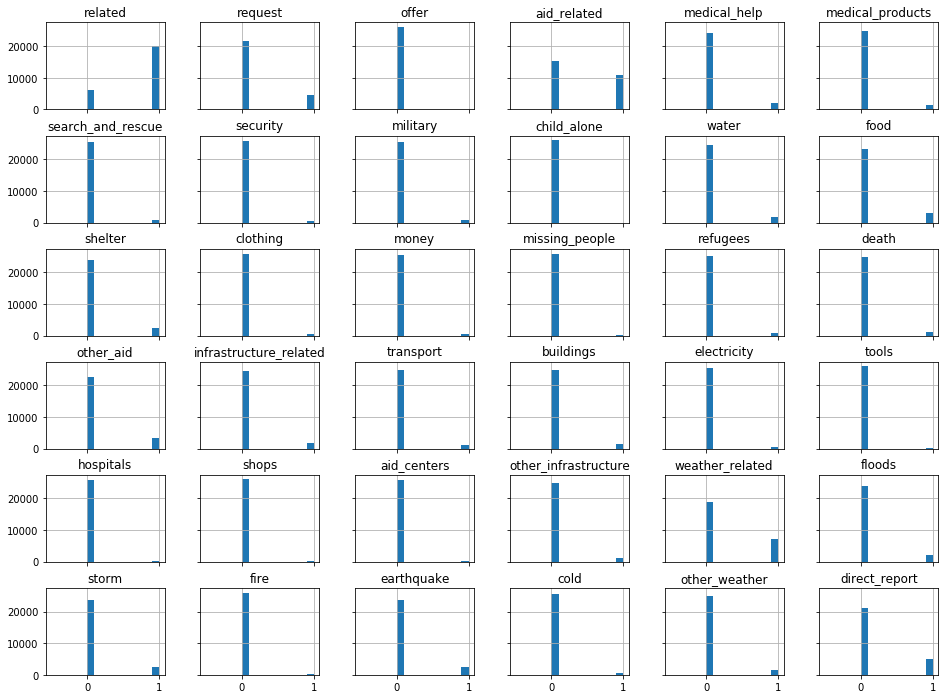

In [8]:
df.drop(columns=['id','message','original','categories','genre']).hist(figsize=(16,12), sharey=True, sharex=True);

In [9]:
df_labels = df.drop(columns=['id','message','original','categories','genre'])
df_null = df_labels[~df_labels.any(axis=1)]
df_null.shape

(6114, 36)

### 1.2 split dataset in Features and Labels

In [10]:
X = df['message']
Y = df.drop(columns=['message','original','categories','genre','id'])

## 2. Review dataset
### 2.1 check for URLs 

In [11]:
pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
x_urls = X.str.findall(pattern)
x_urls[[ len(x)>0 for x in x_urls]]
# alternative x_urls[x_urls.str.len().gt(0)]

5019                              [http://www.jobpaw.com/]
5288     [http://welcome.topuertorico.org/government.sh...
7328              [http://wap.sina.comhttp://wap.sina.com]
8835              [http://ea.mobile.nokia.com/ea/graphics]
9707     [http://172.16.3.136/mymain2.php, http://172.1...
                               ...                        
24965    [http://www.usaid.gov/hum_response/ofda/situat...
25214    [http://www.ausaid.gov.au/hottopics/topic.cfm?...
25345    [http://www.irinnews.org/Report/94826/SENEGAL-...
25668    [http://www.ocfa.gov.ae/En/MediaCenter/OCFANew...
26126    [http://agritrade.cta.int/Agriculture/Commodit...
Name: message, Length: 668, dtype: object

In [12]:
pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
X.replace(to_replace=pattern, value='urlplaceholder', regex=True, inplace=True)


In [13]:
pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
x_urls = X.str.findall(pattern)
x_urls_df = pd.DataFrame({'url': x_urls})
x_urls_df['num_of_entries'] = x_urls_df.applymap(lambda x: len(x))
x_urls_df[x_urls_df['num_of_entries']>0]

,url,num_of_entries


## 3. Write a tokenization function to process your text data

In [38]:
pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
reg = re.compile(pattern)
lemmatizer = WordNetLemmatizer()

def tokenize(text, enable_lemmatizer=False):
    # replace url
    text = reg.sub('urlplaceholder',text)
    # tokenize text
    tokens = word_tokenize(text)
    
    # lemmatize andremove stop words
    if enable_lemmatizer:
        tokens = [lemmatizer.lemmatize(word.lower().strip()) for word in tokens]
    else:
        tokens = [word.lower().strip() for word in tokens]

    return tokens

def tokenize_std(text):
    return tokenize(text, False)

def tokenize_lem(text):
    return tokenize(text, True)

### custom estimator starting verb
checks if a message starts with a verb

In [17]:
class StartingVerbExtractor(BaseEstimator, TransformerMixin):
    ''' Determines if first word 
    
        in a body of text is a verb
    
    '''
    def starting_verb(self, text):
        sentence_list = nltk.sent_tokenize(text)
        for sentence in sentence_list:
            pos_tags = nltk.pos_tag(tokenize(sentence))
            first_word, first_tag = pos_tags[0]
            if first_tag in ['VB', 'VBP'] or first_word == 'RT':
                return True
        return False

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_tagged = pd.Series(X).apply(self.starting_verb)
        return pd.DataFrame(X_tagged)

## 4. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [39]:
def build_pipeline (starting_verb=False):
    if not starting_verb:
        pipeline = Pipeline([
            #('vectorizer', CountVectorizer()),
            #('tfidf', TfidfTransformer())
            ('tfidf_vect', TfidfVectorizer(tokenizer=tokenize)),
            ('clf', MultiOutputClassifier(RandomForestClassifier(n_jobs=-1)))
            #('clf', MultiOutputClassifier())
        ])
    else:    
        pipeline = Pipeline([
            ('features', FeatureUnion([
                ('tfidf_vect', TfidfVectorizer(tokenizer=tokenize)),
                ('starting_verb', StartingVerbExtractor())
            ])),
            ('clf', MultiOutputClassifier(RandomForestClassifier(n_jobs=-1)))
        ])

    return pipeline

### 4.1 TfidfVectorizer Parameters

**max_df**: float or int, default=1.0
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words)

**min_df**: float or int, default=1 
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold.

### 4.2 Train & Test  pipeline
- Split data into train and test sets
- Train pipeline

In [52]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


pipeline = Pipeline([
                ('tfidf_vect', TfidfVectorizer(ngram_range=(1,2), max_features=5000, max_df =0.5)),
                ('clf', MultiOutputClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100)))
        ])
#run the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf_vect',
                 TfidfVectorizer(max_df=0.5, max_features=5000,
                                 ngram_range=(1, 2))),
                ('clf',
                 MultiOutputClassifier(estimator=RandomForestClassifier(n_jobs=-1)))])

In [53]:
y_pred = pipeline.predict(X_test)

## 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [56]:
print (pipeline.get_params()) 

{'memory': None, 'steps': [('tfidf_vect', TfidfVectorizer(max_df=0.5, max_features=5000, ngram_range=(1, 2))), ('clf', MultiOutputClassifier(estimator=RandomForestClassifier(n_jobs=-1)))], 'verbose': False, 'tfidf_vect': TfidfVectorizer(max_df=0.5, max_features=5000, ngram_range=(1, 2)), 'clf': MultiOutputClassifier(estimator=RandomForestClassifier(n_jobs=-1)), 'tfidf_vect__analyzer': 'word', 'tfidf_vect__binary': False, 'tfidf_vect__decode_error': 'strict', 'tfidf_vect__dtype': <class 'numpy.float64'>, 'tfidf_vect__encoding': 'utf-8', 'tfidf_vect__input': 'content', 'tfidf_vect__lowercase': True, 'tfidf_vect__max_df': 0.5, 'tfidf_vect__max_features': 5000, 'tfidf_vect__min_df': 1, 'tfidf_vect__ngram_range': (1, 2), 'tfidf_vect__norm': 'l2', 'tfidf_vect__preprocessor': None, 'tfidf_vect__smooth_idf': True, 'tfidf_vect__stop_words': None, 'tfidf_vect__strip_accents': None, 'tfidf_vect__sublinear_tf': False, 'tfidf_vect__token_pattern': '(?u)\\b\\w\\w+\\b', 'tfidf_vect__tokenizer': None,

In [55]:
print(metrics.classification_report(y_test.reset_index(drop=True), y_pred, target_names=y_test.columns.values ))

                        precision    recall  f1-score   support

               related       0.82      0.96      0.88      5972
               request       0.83      0.52      0.64      1320
                 offer       0.00      0.00      0.00        35
           aid_related       0.77      0.66      0.71      3282
          medical_help       0.69      0.08      0.15       666
      medical_products       0.71      0.16      0.26       422
     search_and_rescue       0.74      0.08      0.14       222
              security       0.00      0.00      0.00       141
              military       0.64      0.08      0.14       262
           child_alone       0.00      0.00      0.00         0
                 water       0.84      0.48      0.61       510
                  food       0.81      0.71      0.76       902
               shelter       0.80      0.46      0.58       696
              clothing       0.81      0.16      0.26       109
                 money       0.75      

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1

## Copy Model from Sagemaker instance to S3

In [19]:
import sagemaker
from sagemaker import get_execution_role
import boto3
import json

sess = sagemaker.Session()

role = get_execution_role()
print(
    role
)  # This is the role that SageMaker would use to leverage AWS resources (S3, CloudWatch) on your behalf

bucket = sess.default_bucket()  # Replace with your own bucket name if needed
print(bucket)
prefix = "dsnd/DisasterResponse/"  # Replace with the prefix under which you want to store the data if needed

arn:aws:iam::292575554790:role/service-role/AmazonSageMaker-ExecutionRole-20210623T185751
sagemaker-eu-central-1-292575554790


In [20]:
from botocore.exceptions import ClientError
def s3_upload_file (file_name:str, s3_bucket: str, s3_prefix:str, object_name:str=None):
    # If S3 object_name was not specified, use file_name
    if object_name is None:
        object_name = prefix + file_name

    # Upload the file
    s3_client = boto3.client('s3')
    try:
        response = s3_client.upload_file(file_name, s3_bucket, object_name)
    except ClientError as e:
        logging.error(e)
        return False
    return True

## 6. Improve your model
Use grid search to find better parameters. 

In [52]:
pipeline = build_pipeline(True)
pipeline

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tfidf_vect',
                                                 TfidfVectorizer()),
                                                ('starting_verb',
                                                 StartingVerbExtractor())])),
                ('clf',
                 MultiOutputClassifier(estimator=RandomForestClassifier(n_jobs=-1)))])

In [63]:
# parameters for GridSearch
parameters = {
    'tfidf_vect__ngram_range': ((1, 2), (1, 3)),
    'tfidf_vect__max_df': (0.5, 0.75, 0.95),
    'tfidf_vect__max_features': (5000, 12000),
    'clf__estimator' : ([RandomForestClassifier(n_jobs=-1, n_estimators=150)])
}

parameters_sv = {
    'features__tfidf_vect__ngram_range': ([(1, 2)]),
    'features__tfidf_vect__max_df': (0.5, 0.75),
    'features__tfidf_vect__max_features': (5000, 12000),
    'features__tfidf_vect__tokenizer': ([tokenize_std]),
    'clf__estimator' : ([RandomForestClassifier(n_jobs=-1, n_estimators=125)])
}

In [ ]:
print(dt.datetime.now().isoformat())
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
pipeline = build_pipeline(False)
cv = GridSearchCV(pipeline, param_grid = parameters, verbose=4, cv=10)
model = cv
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(dt.datetime.now().isoformat())

fname = 'disaster_response_mode_NoSV_'+dt.datetime.now().isoformat()[:19]
dump(model, fname) 
s3_upload_file(fname, 'sagemaker-eu-central-1-292575554790',prefix)

print(metrics.classification_report(y_test.reset_index(drop=True), y_pred, target_names=y_test.columns.values))

2021-06-30T05:32:34.154844
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END clf__estimator=RandomForestClassifier(n_estimators=150, n_jobs=-1), tfidf_vect__max_df=0.5, tfidf_vect__max_features=5000, tfidf_vect__ngram_range=(1, 2);, score=0.269 total time= 1.1min


In [ ]:
print(dt.datetime.now().isoformat())
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
pipeline = build_pipeline(True)
cv = GridSearchCV(pipeline, param_grid = parameters_sv, verbose=4, cv=10)
model = cv
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(dt.datetime.now().isoformat())

fname = 'disaster_response_mode_SV_lem'+dt.datetime.now().isoformat()[:19]
dump(model, fname) 
s3_upload_file(fname, 'sagemaker-eu-central-1-292575554790',prefix)

print(metrics.classification_report(y_test.reset_index(drop=True), y_pred, target_names=y_test.columns.values))

2021-06-30T18:51:35.064225
Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END clf__estimator=RandomForestClassifier(n_estimators=125, n_jobs=-1), features__tfidf_vect__max_df=0.5, features__tfidf_vect__max_features=5000, features__tfidf_vect__ngram_range=(1, 2), features__tfidf_vect__tokenizer=<function tokenize_std at 0x7f8ed7fab290>;, score=0.275 total time= 1.6min
[CV 2/10] END clf__estimator=RandomForestClassifier(n_estimators=125, n_jobs=-1), features__tfidf_vect__max_df=0.5, features__tfidf_vect__max_features=5000, features__tfidf_vect__ngram_range=(1, 2), features__tfidf_vect__tokenizer=<function tokenize_std at 0x7f8ed7fab290>;, score=0.270 total time= 1.6min
[CV 3/10] END clf__estimator=RandomForestClassifier(n_estimators=125, n_jobs=-1), features__tfidf_vect__max_df=0.5, features__tfidf_vect__max_features=5000, features__tfidf_vect__ngram_range=(1, 2), features__tfidf_vect__tokenizer=<function tokenize_std at 0x7f8ed7fab290>;, score=0.241 total time= 1

In [68]:
print (model.best_params_)

{'clf__estimator': RandomForestClassifier(n_estimators=125, n_jobs=-1), 'features__tfidf_vect__max_df': 0.5, 'features__tfidf_vect__max_features': 5000, 'features__tfidf_vect__ngram_range': (1, 2), 'features__tfidf_vect__tokenizer': <function tokenize_std at 0x7f8ed7fab290>}


### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

#### Check Model Quality

In [70]:
print(metrics.classification_report(y_test.reset_index(drop=True), y_pred, target_names=y_test.columns.values))

                        precision    recall  f1-score   support

               related       0.81      0.97      0.88      5999
               request       0.86      0.52      0.65      1303
                 offer       0.00      0.00      0.00        34
           aid_related       0.76      0.64      0.70      3234
          medical_help       0.68      0.11      0.20       646
      medical_products       0.68      0.16      0.27       394
     search_and_rescue       0.65      0.15      0.25       217
              security       0.67      0.01      0.03       141
              military       0.59      0.05      0.10       245
           child_alone       0.00      0.00      0.00         0
                 water       0.84      0.54      0.66       518
                  food       0.80      0.73      0.77       874
               shelter       0.81      0.51      0.63       692
              clothing       0.67      0.18      0.29       121
                 money       0.67      

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1

#### Load Model from Storage

In [35]:
#model2 = load('disaster_response_model.joblib') 
model_sverb = load('disaster_response_model_sverb.joblib') 
#model_latest = load('disaster_response_mode_2021-06-27T11_48.joblib') 
model_nosv = load('disaster_response_mode_NoSV_2021-06-30.joblib') 
model_sv = load('disaster_response_mode_SV2021-06-30.joblib') 


In [34]:
target_names = y_test.columns.values

y_pred_sverb = model_sverb.predict(X_test)
y_pred_nosv = model_nosv.predict(X_test) 
y_pred_sv    = model_sv.predict(X_test) 
print(metrics.classification_report(y_test.reset_index(drop=True), y_pred_sverb, target_names=target_names))
print(metrics.classification_report(y_test.reset_index(drop=True), y_pred_sv, target_names=target_names))
print(metrics.classification_report(y_test.reset_index(drop=True), y_pred_nosv, target_names=target_names))
#disaster_response_mode_SV2021-06-30.joblib

                        precision    recall  f1-score   support

               related       0.94      0.99      0.96      5999
               request       0.97      0.85      0.90      1303
                 offer       1.00      0.71      0.83        34
           aid_related       0.94      0.89      0.91      3234
          medical_help       0.98      0.73      0.84       646
      medical_products       0.97      0.71      0.82       394
     search_and_rescue       0.98      0.74      0.84       217
              security       1.00      0.65      0.79       141
              military       0.97      0.73      0.83       245
           child_alone       0.00      0.00      0.00         0
                 water       0.98      0.85      0.91       518
                  food       0.94      0.92      0.93       874
               shelter       0.95      0.85      0.90       692
              clothing       0.96      0.74      0.83       121
                 money       0.99      

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1

In [57]:
print (model2.best_params_) 
print (model_sverb.best_params_) 
print (model_latest.best_params_) 

{'tfidf_vect__max_df': 0.5, 'tfidf_vect__max_features': 5000, 'tfidf_vect__ngram_range': (1, 2)}
{'tfidf_vect__max_df': 0.5, 'tfidf_vect__max_features': 5000, 'tfidf_vect__ngram_range': (1, 2)}
{'clf__estimator': RandomForestClassifier(n_estimators=150, n_jobs=-1), 'tfidf_vect__max_df': 0.5, 'tfidf_vect__max_features': 5000, 'tfidf_vect__ngram_range': (1, 2)}


In [ ]:
display_results(model, y_test, y_pred)

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

### 9. Export your model as a pickle file